In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import f_oneway

In [ ]:
#Reading the data set
shop = pd.read_csv('/content/drive/MyDrive/dataset/shopping_trends.csv')

## 1 What is the overall distribution of customer ages in the dataset?

In [ ]:
shop['Age'].value_counts()

,count
Age,
69,88
57,87
41,86
25,85
49,84
50,83
54,83
27,83
62,83


In [ ]:
shop['Age'].mean()

44.06846153846154

In [ ]:
shop['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
fig = px.histogram(shop , y = 'Age' , x = 'Gender', color_discrete_sequence=['#2A9D8F'])
fig.show()

## 2 How does the average purchase amount vary across different product categories?

In [ ]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [ ]:
shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [ ]:
shop.groupby('Category')['Purchase Amount (USD)'].mean()

,Purchase Amount (USD)
Category,
Accessories,59.838710
Clothing,60.025331
Footwear,60.255426
Outerwear,57.172840


## 3 Which gender has the highest number of purchases?

In [ ]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

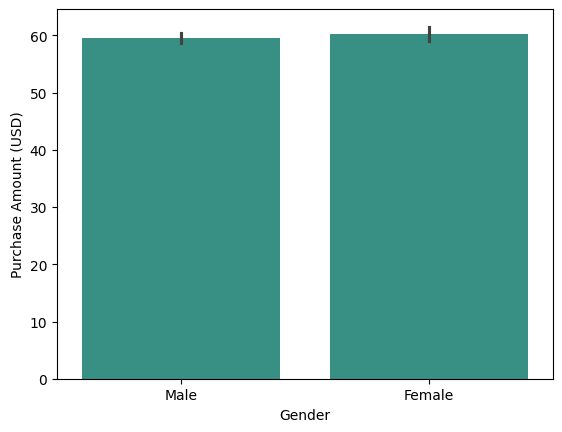

In [ ]:
sns.barplot(shop , x = 'Gender' , y = 'Purchase Amount (USD)', color='#2A9D8F' )

## 4 What are the most commonly purchased items in each category?

In [ ]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [ ]:
shop.groupby('Category')['Item Purchased'].value_counts()

Category     Item Purchased
Accessories  Jewelry           171
             Belt              161
             Sunglasses        161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Blouse            171
             Pants             171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: count, dtype: int64

In [ ]:
fig = px.histogram(shop , x = 'Item Purchased' , color = 'Category', )
fig.show()

## 5 Are there any specific seasons or months where customer spending is significantly higher?

In [ ]:
shop['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [ ]:
shop[shop['Season'] == 'Summer'].value_counts().sum()

955

In [ ]:
shop[shop['Season'] == 'Winter'].value_counts().sum()

971

In [ ]:
shop[shop['Season'] == 'Spring'].value_counts().sum()

999

In [ ]:
shop[shop['Season'] == 'Fall'].value_counts().sum()

975

In [ ]:
custom_color_map = {
    'Spring': '#FF5733',
    'Summer': '#33FF57',
    'Fall': '#3357FF',
    'Winter': '#F0E68C'
}

fig = px.histogram(
    shop,
    x='Season',
    range_y=[200, 1500],
    color='Season',
    color_discrete_map=custom_color_map
)

fig.show()

## 6 What is the average rating given by customers for each product category?

In [ ]:
shop_groupby = shop.groupby('Category')['Review Rating'].mean().reset_index()

In [ ]:
fig = px.bar(shop_groupby, x='Category', y='Review Rating',
             color='Category',
             color_discrete_map={'Category1': 'red', 'Category2': 'blue', 'Category3': 'green'})
fig.show()


## 7 Are there any notable differences in purchase behavior between subscribed and non-subscribed customers?

In [ ]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [ ]:
shop['Subscription Status'].unique()

array(['Yes', 'No'], dtype=object)

<ipython-input-93-e96e6e94101e>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




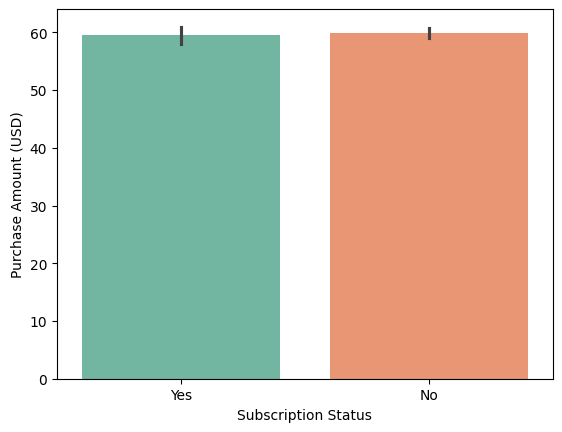

In [ ]:
sns.barplot(data=shop, x='Subscription Status', y='Purchase Amount (USD)', palette='Set2')
plt.show()

In [ ]:
shop['Purchase Amount (USD)'].sum()

233081

In [ ]:
shop.groupby('Subscription Status')['Purchase Amount (USD)'].mean()

,Purchase Amount (USD)
Subscription Status,
No,59.865121
Yes,59.491928


## 8 Which payment method is the most popular among customers?

In [ ]:
shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending= False)

,Purchase Amount (USD)
Payment Method,
Venmo,61.241960
Credit Card,61.159483
Cash,59.927469
Bank Transfer,58.738924
PayPal,58.697492
Debit Card,58.638231


In [ ]:
shop_groupby = shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().reset_index()

In [ ]:
fig = px.bar(shop_groupby, x='Payment Method', y='Purchase Amount (USD)',
             color='Purchase Amount (USD)', color_continuous_scale='Viridis')
fig.show()

<ipython-input-98-47a9ae88266a>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




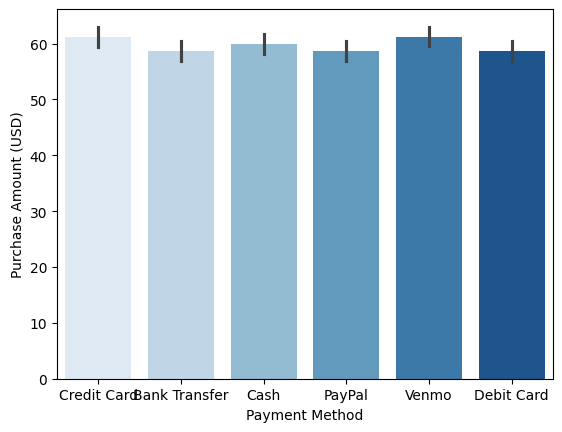

In [ ]:
sns.barplot(data=shop, x='Payment Method', y='Purchase Amount (USD)', palette='Blues')
plt.show()

## 9 Do customers who use promo codes tend to spend more than those who don't?

In [ ]:
shop_groupby  = shop.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().reset_index()

In [ ]:
fig = px.sunburst(shop, path=['Gender', 'Promo Code Used'], values='Purchase Amount (USD)',
                  color='Promo Code Used',
                  color_discrete_map={'Promo1': 'blue', 'Promo2': 'green', 'Promo3': 'red'})
fig.show()


In [ ]:
fig = px.bar(shop.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().reset_index(),
             x='Promo Code Used', y='Purchase Amount (USD)',
             color='Purchase Amount (USD)',
             color_continuous_scale='Viridis')
fig.show()

## 10 How does the frequency of purchases vary across different age groups?

In [ ]:
shop[['Age' , 'Gender']]

,Age,Gender
0,55,Male
1,19,Male
2,50,Male
3,21,Male
4,45,Male
...,...,...
3895,40,Female
3896,52,Female
3897,46,Female
3898,44,Female


In [ ]:
shop['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
shop_group = shop.groupby('Frequency of Purchases')['Age'].sum()

In [ ]:
px.sunburst(shop , path=['Frequency of Purchases','Gender'] , values='Age')

## 11 Are there any correlations between the size of the product and the purchase amount?

In [ ]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [ ]:
shop_group = shop.groupby('Size')['Purchase Amount (USD)'].sum().reset_index()

In [ ]:
fig = px.bar(shop_group, x='Size', y='Purchase Amount (USD)',
             color='Purchase Amount (USD)',
             color_continuous_scale='Viridis')
fig.show()

## 12 Which shipping type is preferred by customers for different product categories?

In [ ]:
shop.groupby('Category')['Shipping Type'].value_counts().sort_values(ascending= False)

Category     Shipping Type 
Clothing     Standard          297
             Free Shipping     294
             Next Day Air      293
             Express           290
             Store Pickup      282
             2-Day Shipping    281
Accessories  Store Pickup      217
             Next Day Air      211
             Standard          208
             2-Day Shipping    206
             Express           203
             Free Shipping     195
Footwear     Free Shipping     122
             Standard          100
             Store Pickup       98
             Express            96
             Next Day Air       93
             2-Day Shipping     90
Outerwear    Free Shipping      64
             Express            57
             Store Pickup       53
             Next Day Air       51
             2-Day Shipping     50
             Standard           49
Name: count, dtype: int64

In [ ]:
shop['Shipping_Category'] =shop['Shipping Type'].map({'Express': 0, 'Free Shipping': 1, 'Next Day Air': 2,
                                                       'Standard': 3, '2-Day Shipping': 4, 'Store Pickup': 5})

In [ ]:
shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [ ]:
shop['Category_num'] =shop['Category'].map({'Clothing':1, 'Footwear':2, 'Outerwear':3, 'Accessories':4})

## 13 How does the presence of a discount affect the purchase decision of customers?

In [ ]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'Shipping_Category', 'Category_num'],
      dtype='object')

In [ ]:
shop_group = shop.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index()

In [ ]:
shop_group = shop.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index()

fig = px.histogram(shop_group, x='Discount Applied', y='Purchase Amount (USD)',
                   color='Discount Applied',
                   color_discrete_map={'Yes': 'blue', 'No': 'red'})
fig.show()

In [ ]:
fig = px.sunburst(shop , path = ['Gender' , 'Discount Applied'], values='Purchase Amount (USD)' , color= 'Gender')

fig.show()

## 14 Are there any specific colors that are more popular among customers?

In [ ]:
fig = px.histogram(shop, x='Color', color='Color')
fig.show()

In [ ]:
shop['Color'].value_counts().nlargest(5)

,count
Color,
Olive,177
Yellow,174
Silver,173
Teal,172
Green,169


## 15 What is the average number of previous purchases made by customers?

In [ ]:
shop['Previous Purchases'].mean()

25.35153846153846

## 16 Are there any noticeable differences in purchase behavior between different locations?

In [ ]:
shop.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending = False)

,Purchase Amount (USD)
Location,
Alaska,67.597222
Pennsylvania,66.567568
Arizona,66.553846
West Virginia,63.876543
Nevada,63.379310
Washington,63.328767
North Dakota,62.891566
Virginia,62.883117
Utah,62.577465


In [ ]:
shop_group = shop.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()

In [ ]:
fig = px.bar(shop_group, x='Location', y='Purchase Amount (USD)',
             color='Location',
             color_discrete_map={'City1': 'blue', 'City2': 'green', 'City3': 'red'})
fig.show()

## 17 Is there a relationship between customer age and the category of products they purchase?

In [ ]:
shop_group = shop.groupby('Category')['Age'].mean().reset_index()


In [ ]:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
fig = px.bar(shop_group, x='Category', y='Age', color='Category', color_discrete_sequence=custom_colors)
fig.show()

## 18 How does the average purchase amount differ between male and female customers?

In [ ]:
shop_group = shop.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index()

In [ ]:
custom_colors = ['#1f77b4', '#ff7f0e']
fig = px.bar(shop_group, x='Gender', y='Purchase Amount (USD)', color='Gender', color_discrete_sequence=custom_colors)
fig.show()


In [ ]:
px.sunburst(data_frame= shop , path = ['Gender' ,'Age'] , values='Purchase Amount (USD)')

# 19. Are there any noticeable differences in purchase behavior between different locations?

In [ ]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'Shipping_Category', 'Category_num'],
      dtype='object')

          Location       mean   sum  count
0          Alabama  59.112360  5261     89
1           Alaska  67.597222  4867     72
2          Arizona  66.553846  4326     65
3         Arkansas  61.113924  4828     79
4       California  59.000000  5605     95
5         Colorado  56.293333  4222     75
6      Connecticut  54.179487  4226     78
7         Delaware  55.325581  4758     86
8          Florida  55.852941  3798     68
9          Georgia  58.797468  4645     79
10          Hawaii  57.723077  3752     65
11           Idaho  60.075269  5587     93
12        Illinois  61.054348  5617     92
13         Indiana  58.924051  4655     79
14            Iowa  60.884058  4201     69
15          Kansas  54.555556  3437     63
16        Kentucky  55.721519  4402     79
17       Louisiana  57.714286  4848     84
18           Maine  56.987013  4388     77
19        Maryland  55.755814  4795     86
20   Massachusetts  60.888889  4384     72
21        Michigan  62.095890  4533     73
22       Mi

<ipython-input-6-500b677c0ba8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='mean', data=location_summary, palette=custom_colors)
<ipython-input-6-500b677c0ba8>:7: UserWarning: 
The palette list has fewer values (5) than needed (50) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Location', y='mean', data=location_summary, palette=custom_colors)


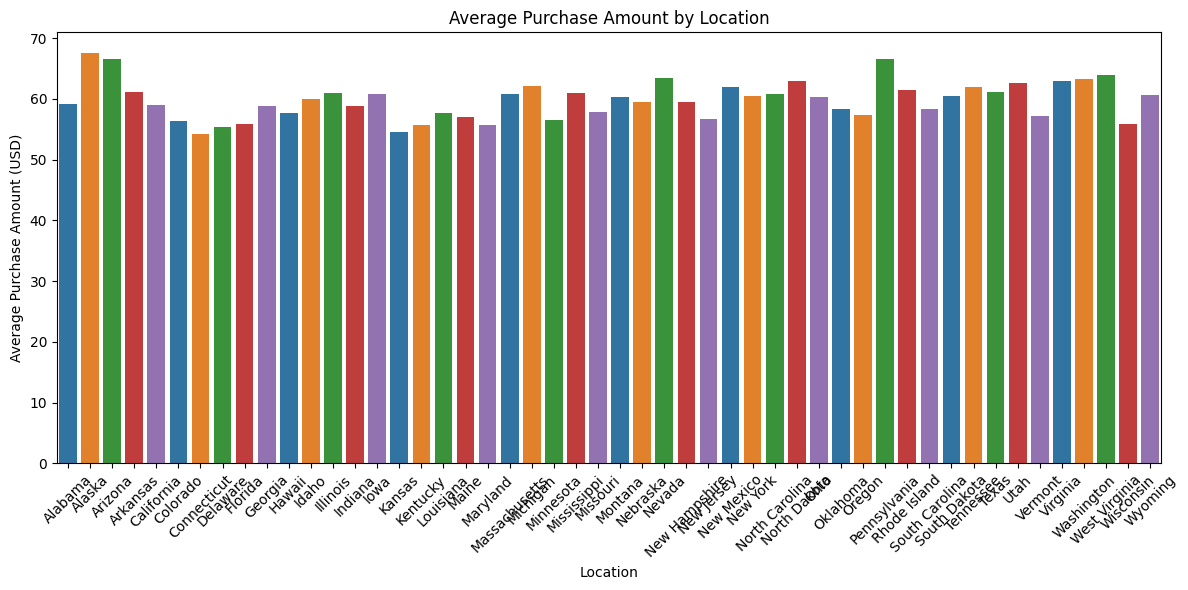

In [ ]:
shop = pd.read_csv('/content/drive/MyDrive/dataset/shopping_trends.csv')
location_summary = shop.groupby('Location')['Purchase Amount (USD)'].agg(['mean', 'sum', 'count']).reset_index()
print(location_summary)
# Visualization - Bar plot for average purchase amount by location
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='mean', data=location_summary, palette=custom_colors)
plt.title('Average Purchase Amount by Location')
plt.xlabel('Location')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-7-e2a599629300>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Location', y='Purchase Amount (USD)', data=shop, palette=custom_colors)
<ipython-input-7-e2a599629300>:4: UserWarning: 
The palette list has fewer values (5) than needed (50) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Location', y='Purchase Amount (USD)', data=shop, palette=custom_colors)


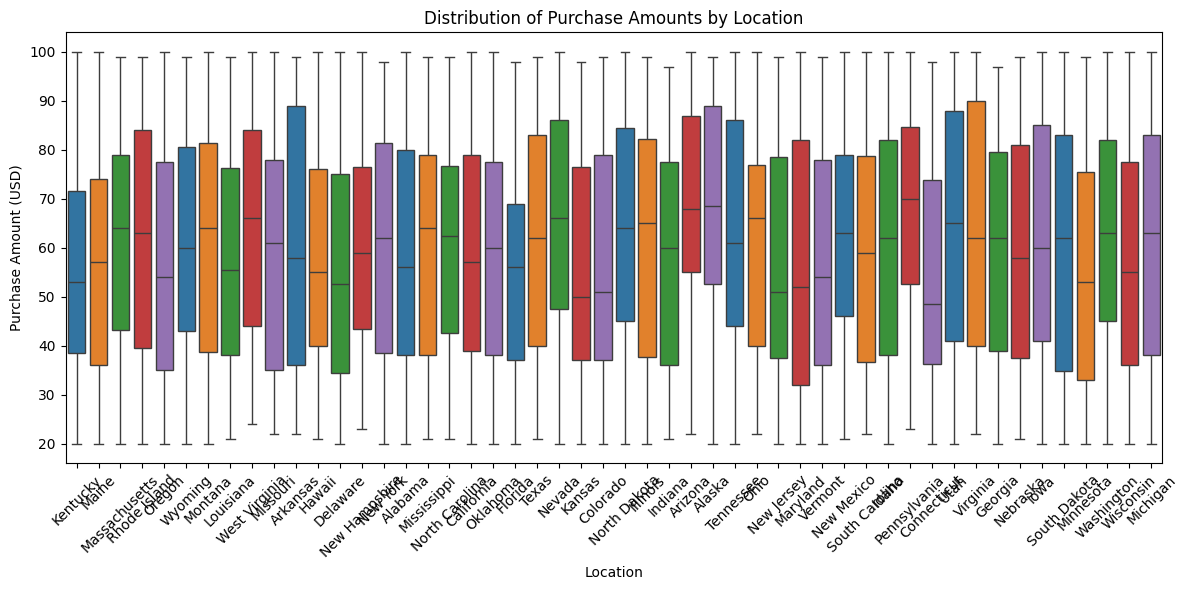

In [ ]:
# Box plot for distribution of purchase amounts by location
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Replace with desired hex codes
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='Purchase Amount (USD)', data=shop, palette=custom_colors)
plt.title('Distribution of Purchase Amounts by Location')
plt.xlabel('Location')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Statistical Test - ANOVA to test differences between locations
locations = shop['Location'].unique()
purchase_amounts_by_location = [shop[shop['Location'] == loc]['Purchase Amount (USD)'].values for loc in locations]

In [ ]:
# Perform ANOVA
anova_result = f_oneway(*purchase_amounts_by_location)
print(f"ANOVA Result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

# Interpretation of Results
if anova_result.pvalue < 0.05:
    print("There are significant differences in purchase behavior between different locations.")
else:
    print("No significant differences in purchase behavior between different locations.")

ANOVA Result: F-statistic = 1.2722095994255833, p-value = 0.09733196399626486
No significant differences in purchase behavior between different locations.
